# Task 2 Option 1 Report
Goal: Generate adversarial examples for the Vanilla ATHENA, using optimaztion-based white-box attack.

# Approaches

We will be approaching this using the Fast Gradient Sign Method with EOT enable, and Projected Gradient Descent with EOT enable. Using these methods, we will have parameters that can be changed to optimize our adversarial examples to ensure the optimization of the machine learning models. The results can be recreated by running the Jupyter notebook Task2.ipynb under the Task2 folder. 

# Fast Gradient Sign Method
The FGSM takes the sign of the gradient and multiplies it by an epsilon and adds the result to the image. On small values of epsilon, the image is visually similar to the human eye but its classification can be completely changed, or the confidence level of the prediction is reduced. The "fast" in its name comes from the fact that it does not do an iterate procedure in order to generate adverserial examples which makes it faster than many other methods.

# Tunable Parameters

In [ ]:
{
"configs6": {
    "attack": "fgsm",
    "description": "FGSM_eps0.05EOT_ON",
    "eps": 0.05,
    "distribution": {
      "num_samples": 500,
      "transformation": "rotation",
      "min_angle": -45,
      "max_angle": 45
    }
  },
  "configs7": {
    "attack": "fgsm",
    "description": "FGSM_eps0.1EOT_ON",
    "eps": 0.1,
    "distribution": {
      "num_samples": 500,
      "transformation": "rotation",
      "min_angle": -45,
      "max_angle": 45
    }
  },
  "configs8": {
    "attack": "fgsm",
    "description": "FGSM_eps0.2EOT_ON",
    "eps": 0.2,
    "distribution": {
      "num_samples": 500,
      "transformation": "rotation",
      "min_angle": -45,
      "max_angle": 45
    }
  },
  "configs9": {
    "attack": "fgsm",
    "description": "FGSM_eps0.5EOT_ON",
    "eps": 0.5,
    "distribution": {
      "num_samples": 500,
      "transformation": "rotation",
      "min_angle": -45,
      "max_angle": 45
    }
  }
}

# Results

| Parameter | Image | Image | Error Rate |
| :---: | :---: |:---:| :---: |
|FGSM0.01 | <img src="../results/FGSM_eps0.01EOT_ON-0.png"> | <img src="../results/FGSM_eps0.01EOT_ON-1.png"> | 0.01 | 
|FGSM0.05 | <img src="../results/FGSM_eps0.05EOT_ON-0.png"> | <img src="../results/FGSM_eps0.01EOT_ON-1.png"> | 0.008 |
|FGSM0.1 | <img src="../results/FGSM_eps0.1EOT_ON-0.png"> | <img src="../results/FGSM_eps0.1EOT_ON-1.png"> | 0.022 |
|FGSM0.2 | <img src="../results/FGSM_eps0.2EOT_ON-0.png"> | <img src="../results/FGSM_eps0.2EOT_ON-1.png"> | 0.05 |
|FGSM0.5 | <img src="../results/FGSM_eps0.5EOT_ON-0.png"> | <img src="../results/FGSM_eps0.5EOT_ON-1.png"> | 0.828 |


# Evaluations results

<h3 align="center">Task 1 Evaluation results are showing below</h3> 

|| Undefended Model | Vanilla Athena | PGD-ADT |
| :--- | :--- | :--- | :--- |
|FGSM-eps0.01 |  0.006072874493927126 | 0.0020242914979757085 | 0.004048582995951417  |
|FGSM-eps0.05 |  0.06882591093117409 | 0.0020242914979757085 | 0.010121457489878543  |
|FGSM-eps0.1 |  0.22874493927125505 | 0.012145748987854251 | 0.02631578947368421  |
|FGSM-eps0.2 |  0.728744939271255 | 0.06882591093117409 | 0.05668016194331984  |


<h3 align="center">Task 2 Evaluation results are showing below</h3> 

| Vanilla Athena model |      Baseline   Error Rate|
|:---:|:---:|
|FGSM_eps0.1   |   0.011493094061901401 |
|FGSM_eps0.15  |  0.030345800988002825|
|FGSM_eps0.2   | 0.07561246093356185|
|FGSM_eps0.25  | 0.19628994858352655|
|FGSM_eps0.3   |  0.39419296300030243|


|Vanilla Athena model (EOT on)| Error Rate| 
|:---:|:---:|
|FGSM_eps0.01 |   0.0020242914979757085|
|FGSM_eps0.05 |  0.004048582995951417|
|FGSM_eps0.1  |   0.010121457489878543|
|FGSM_eps0.2  |   0.058704453441295545|
|FGSM_eps0.5  |   0.8704453441295547|

# Numerical Results

In [15]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

In [27]:
def plotgraphs(graphs):
    handles = []

    for graph in graphs:
        x = np.array(graph['x'])
        y = np.array(graph['y'])

        l, = plt.plot(x, y, graph['color'] + 'o', label=graph['title'])
        plt.plot(x, y, graph['color'], label=graph['title'])

        handles.append(l)

    plt.legend(handles=handles)
    plt.show()

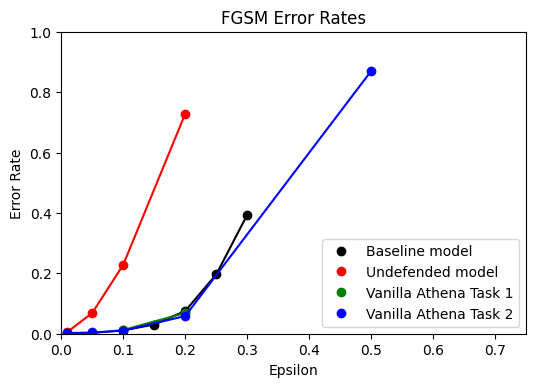

In [24]:
graphs = [
    {
        'title': 'Baseline model',
        'color': 'k',
        'x': [0.1, 0.15, 0.2, 0.25, 0.3],
        'y': [0.011493094061901401, 0.030345800988002825, 0.07561246093356185, 0.19628994858352655, 0.39419296300030243]
    },
    {
        'title': 'Undefended model',
        'color': 'r',
        'x': [0.01, 0.05, 0.1, 0.2],
        'y': [0.006072874493927126, 0.06882591093117409, 0.22874493927125505, 0.728744939271255]
    },
    {
        'title': 'Vanilla Athena Task 1',
        'color': 'g',
        'x': [0.01, 0.05, 0.1, 0.2],
        'y': [0.0020242914979757085, 0.0020242914979757085, 0.012145748987854251, 0.06882591093117409]
    },
    {
        'title': 'Vanilla Athena Task 2',
        'color': 'b',
        'x': [0.01, 0.05, 0.1, 0.2, 0.5],
        'y': [0.0020242914979757085, 0.004048582995951417, 0.010121457489878543, 0.058704453441295545, 0.8704453441295547]
    }
]

fig = plt.figure(dpi=100)
plt.title('FGSM Error Rates')
plt.xlabel('Epsilon')
plt.ylabel('Error Rate')

plt.xlim(0, 0.75)
plt.ylim(0, 1)

plotgraphs(graphs)


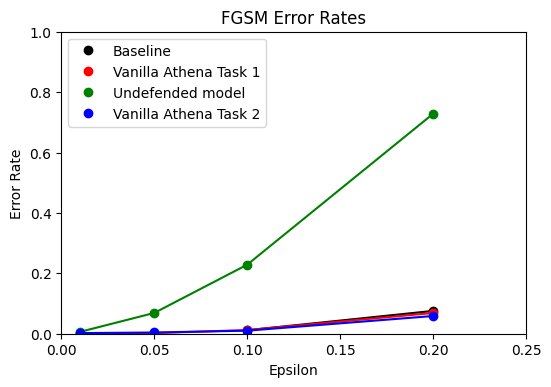

In [25]:
graphs = [
    {
        'title': 'Baseline',
        'color': 'k',
        'x': [0.1, 0.2],
        'y': [0.011493094061901401, 0.07561246093356185]
    },
    {
        'title': 'Vanilla Athena Task 1',
        'color': 'r',
        'x': [0.01, 0.05, 0.1, 0.2],
        'y': [0.0020242914979757085, 0.0020242914979757085, 0.012145748987854251, 0.06882591093117409]
    },
    {
        'title': 'Undefended model',
        'color': 'g',
        'x': [0.01, 0.05, 0.1, 0.2],
        'y': [0.006072874493927126, 0.06882591093117409, 0.22874493927125505, 0.728744939271255]
    },
    {
        'title': 'Vanilla Athena Task 2',
        'color': 'b',
        'x': [0.01, 0.05, 0.1, 0.2],
        'y': [0.0020242914979757085, 0.004048582995951417, 0.010121457489878543, 0.058704453441295545]
    }
]

fig = plt.figure(dpi=100)
plt.title('FGSM Error Rates')
plt.xlabel('Epsilon')
plt.ylabel('Error Rate')

plt.xlim(0, 0.25)
plt.ylim(0, 1)

plotgraphs(graphs)

# Analysis

The EOT enhanced FGSM seems to be fairly consistent with both the Task 1 Vanilla Athena and The Baseline at lower epsilon values.
At an epsilon of 0.2, the EOT FGSM seems to fall behind the other values, which could indicate that the EOT is less effective at higher epsilon values.

# Project Gradient Descent

The PGD attack is an iterative attack, which can be seen as a replica of FGSM -- K-FGSM(K represents the numbers of iterations). The general idea of FGSM is that one iteration is a big step while PGD does multiple iterations. Each iteration is a small step, and each iteration will disturb clip to the specified range.

# Tunable Parameters

In [ ]:
{
"configs0": {
    "attack": "pgd",
    "description": "PGD_eps0.05EOT_ON",
    "eps": 0.05,
    "distribution": {
      "num_samples": 500,
      "transformation": "translation",
      "min_offset": -0.2,
      "max_offset": 0.2
    }
  },
  "configs1": {
    "attack": "pgd",
    "description": "PGD_eps0.2EOT_ON",
    "eps": 0.2,
    "distribution": {
      "num_samples": 500,
      "transformation": "translation",
      "min_offset": -0.2,
      "max_offset": 0.2
    }
  },
  "configs2": {
    "attack": "pgd",
    "description": "PGD_eps0.5EOT_ON",
    "eps": 0.5,
    "distribution": {
      "num_samples": 500,
      "transformation": "translation",
      "min_offset": -0.2,
      "max_offset": 0.2
    }
  },
  "configs3": {
    "attack": "pgd",
    "description": "PGD_eps0.7EOT_ON",
    "eps": 0.7,
    "distribution": {
      "num_samples": 500,
      "transformation": "translation",
      "min_offset": -0.2,
      "max_offset": 0.2
    }
  },
  "configs4": {
    "attack": "pgd",
    "description": "PGD_eps0.1EOT_ON",
    "eps": 0.1,
    "distribution": {
      "num_samples": 500,
      "transformation": "translation",
      "min_offset": -0.2,
      "max_offset": 0.2
    }
  }
}

# Results

| Parameter | Image | Image | Error Rate |
| :---: | :---: |:---:| :---: |
|PGD0.05 | <img src="../results/PGD_eps0.05EOT_ON-0.png"> | <img src="../results/PGD_eps0.05EOT_ON-0.png"> | 0.012 | 
|PGD0.1 | <img src="../results/PGD_eps0.1EOT_ON-0.png"> | <img src="../results/PGD_eps0.1EOT_ON-1.png"> | 0.018 |
|PGD0.2 | <img src="../results/PGD_eps0.2EOT_ON-0.png"> | <img src="../results/PGD_eps0.2EOT_ON-1.png"> | 0.038 |
|PGD0.5 | <img src="../results/PGD_eps0.5EOT_ON-0.png"> | <img src="../results/PGD_eps0.5EOT_ON-1.png"> | 0.754 |
|PGD0.7 | <img src="../results/PGD_eps0.7EOT_ON-0.png"> | <img src="../results/PGD_eps0.7EOT_ON-1.png"> | 0.948 |

# Evaluation Results

<h3 align="center">Task 1 Evaluation results are showing below</h3> 

| | Undefended Model | Vanilla Athena | PGD-ADT |
|:---:| :---: | :---: | :---: | 
|PGD_eps0.05 |  0.10931174089068826 | 0.004048582995951417 | 0.010121457489878543  |
|PGD_eps0.2 | 0.9838056680161943| 0.06477732793522267 | 0.058704453441295545 |
| PGD_eps0.5 | 0.9878542510121457 | 0.7874493927125507 | 0.680161943319838 |
|PGD_eps0.7 | 0.9878542510121457 | 0.8967611336032388 | 0.951417004048583 |

<h3 align="center">Task 2 Evaluation results are showing below</h3> 

| Vanilla Athena Model | baseline error rates |
| :---: | :---: |
|PGD_eps0.075| 0.008468595624558928|
|PGD_eps0.082| 0.010081661457808247|
|PGD_eps0.09| 0.011694727291057565|
|PGD_eps0.1| 0.014517592499243875|
|PGD_eps0.11| 0.019659239842726082|

| Vanilla Athena Model (EOT on) | error rates |
| :---: | :---: |
|PGD_eps0.05 | 0.006072874493927126|
|PGD_eps0.1 | 0.022267206477732792|
|PGD_eps0.2 | 0.12753036437246965|
|PGD_eps0.5 | 0.8866396761133604|
|PGD_eps0.7 | 0.9655870445344129|

# Numerical Results

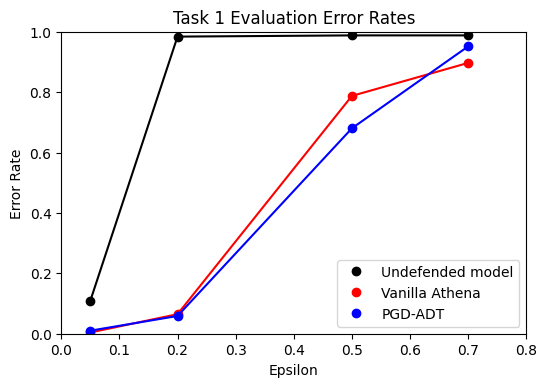

In [20]:
graphs = [
    {
        'title': 'Undefended model',
        'color': 'k',
        'x': [0.05, 0.2, 0.5, 0.7],
        'y': [0.10931174089068826, 0.9838056680161943, 0.9878542510121457, 0.9878542510121457]
    },
    {
        'title': 'Vanilla Athena',
        'color': 'r',
        'x': [0.05, 0.2, 0.5, 0.7],
        'y': [0.004048582995951417, 0.06477732793522267, 0.7874493927125507, 0.8967611336032388]
    },
    {
        'title': 'PGD-ADT',
        'color': 'b',
        'x': [0.05, 0.2, 0.5, 0.7],
        'y': [0.010121457489878543, 0.058704453441295545, 0.680161943319838, 0.951417004048583]
    }
]

fig = plt.figure(dpi=100)
plt.title('Task 1 Evaluation Error Rates')
plt.xlabel('Epsilon')
plt.ylabel('Error Rate')

plt.xlim(0, 0.8)
plt.ylim(0, 1)

plotgraphs(graphs)

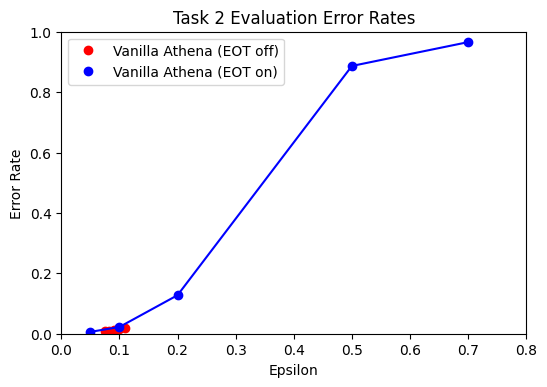

In [26]:
graphs = [
    {
        'title': 'Vanilla Athena (EOT off)',
        'color': 'r',
        'x': [0.075, 0.082,0.09, 0.1, 0.11],
        'y': [0.008468595624558928, 0.010081661457808247, 0.011694727291057565, 0.014517592499243875, 0.019659239842726082]
    },
    {
        'title': 'Vanilla Athena (EOT on)',
        'color': 'b',
        'x': [0.05, 0.1, 0.2, 0.5, 0.7],
        'y': [0.006072874493927126, 0.022267206477732792, 0.12753036437246965, 0.8866396761133604, 0.9655870445344129]
    }
]

fig = plt.figure(dpi=100)
plt.title('Task 2 Evaluation Error Rates')
plt.xlabel('Epsilon')
plt.ylabel('Error Rate')

plt.xlim(0, 0.8)
plt.ylim(0, 1)

plotgraphs(graphs)

# Analysis
Vanilla Athena with EOT attack version is more effective compared to the given original Vanilla Athena. For 

# Contribution


# Citation
“Adversarial Example Using FGSM" *TensorFlow*, www.tensorflow.org/tutorials/generative/adversarial_fgsm. 

StatQuest with Josh Starmer. "Gradient Descent, Step-by-Step"*YouTube* video, Feb 5, 2019.
https://www.youtube.com/watch?v=sDv4f4s2SB8&ab_channel=StatQuestwithJoshStarmer
 
Anish Athalye, Logan Engstrom,Andrew Ilyas, Kevin Kwok."Synthesizing Robust Adversarial Examples". June, 7, 2018.
https://arxiv.org/pdf/1707.07397.pdf.

Synthesizing robust adversarial examples(2018) prabhant.[Source Code]
https://github.com/prabhant/synthesizing-robust-adversarial-examples.


